# Milkrun Prediction

### Siddhesh Bagwe

### Importing the libraries

In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Exploratory Data Analysis

In [225]:
data = pd.read_excel("Local_Transit_ETA_Prediction_dataset_2023_09_28.xlsx")

In [226]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7917 entries, 0 to 7916
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   trip_id                               7917 non-null   float64
 1   drop_sequence                         7917 non-null   float64
 2   distance_calculated                   7887 non-null   float64
 3   distance_covered_till_drop            7904 non-null   float64
 4   origin_warehouse_code                 7917 non-null   object 
 5   destination_warehouse_code            7917 non-null   int64  
 6   total_quantity                        7917 non-null   float64
 7   actual_transit_time_from_cnf_minutes  7887 non-null   float64
 8   trip_created_date                     7917 non-null   object 
 9   trip_start_time                       7907 non-null   object 
 10  geofence_in_time                      7897 non-null   object 
 11  geofence_out_time

In [227]:
data.dropna(inplace = True)

In [228]:
data.describe()

,trip_id,drop_sequence,distance_calculated,distance_covered_till_drop,destination_warehouse_code,total_quantity,actual_transit_time_from_cnf_minutes
count,7833.000000,7833.000000,7833.000000,7833.000000,7.833000e+03,7833.000000,7833.000000
mean,166560.203370,3.935912,7.399974,22.507468,1.192512e+07,12.278054,117.625427
std,96330.696013,2.693147,67.016964,68.396420,5.005901e+06,14.892689,915.095086
min,23297.000000,1.000000,0.000000,0.000000,1.000269e+07,0.000000,-41.996967
25%,81049.000000,2.000000,2.000000,10.000000,1.000436e+07,4.000000,51.982067
50%,152518.000000,3.000000,4.000000,18.000000,1.001102e+07,8.000000,97.233333
75%,245308.000000,6.000000,8.000000,30.000000,1.001424e+07,15.000000,150.766667
max,356098.000000,14.000000,4181.000000,4192.000000,2.500388e+07,150.000000,80434.007183


In [229]:
data.nunique()

trip_id                                 1805
drop_sequence                             14
distance_calculated                       31
distance_covered_till_drop                97
origin_warehouse_code                      1
destination_warehouse_code               136
total_quantity                           113
actual_transit_time_from_cnf_minutes    7578
trip_created_date                        206
trip_start_time                         1804
geofence_in_time                        7620
geofence_out_time                       7621
dtype: int64

(array([3026., 1050.,  914., 1413.,  507.,  364.,  401.,   91.,   43.,
          24.]),
 array([ 1. ,  2.3,  3.6,  4.9,  6.2,  7.5,  8.8, 10.1, 11.4, 12.7, 14. ]),
 <BarContainer object of 10 artists>)

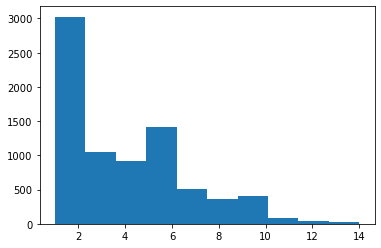

In [230]:
plt.hist(data['drop_sequence'])

<AxesSubplot:>

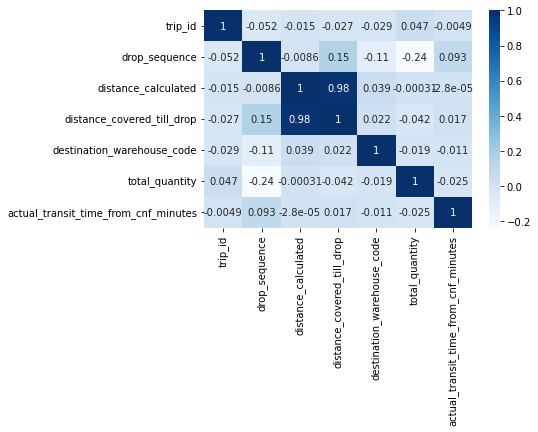

In [231]:
sns.heatmap(data.corr(),annot = True, cmap = 'Blues')

In [232]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7912    False
7913    False
7914    False
7915    False
7916    False
Length: 7833, dtype: bool

In [233]:
data.head()

,trip_id,drop_sequence,distance_calculated,distance_covered_till_drop,origin_warehouse_code,destination_warehouse_code,total_quantity,actual_transit_time_from_cnf_minutes,trip_created_date,trip_start_time,geofence_in_time,geofence_out_time
0,23297.0,1.0,11.0,11.0,C220,25001891,2.0,12.875800,2023-02-01,2023-02-01T10:50:06.452,2023-02-01T11:02:59,2023-02-01T11:15:23
1,23297.0,2.0,16.0,27.0,C220,10015094,30.0,92.809133,2023-02-01,2023-02-01T10:50:06.452,2023-02-01T12:22:55,2023-02-01T12:36:09.980
2,23298.0,1.0,14.0,14.0,C220,10003303,65.0,41.280700,2023-02-01,2023-02-01T10:52:08.158,2023-02-01T11:33:25,2023-02-01T11:56:15.964
3,23372.0,1.0,14.0,14.0,C220,10003303,100.0,17.953983,2023-02-01,2023-02-01T11:26:10.013,2023-02-01T11:44:07.252,2023-02-01T12:06:06.993
4,23595.0,1.0,18.0,18.0,C220,10013469,24.0,63.004467,2023-02-01,2023-02-01T13:18:07.732,2023-02-01T14:21:08,2023-02-01T14:35:58


### Feature Engineering

In [234]:
time = pd.to_datetime(data['trip_start_time'])
data['trip_start_time']= time.dt.time

In [235]:
time1 = pd.to_datetime(data['geofence_in_time'])
data['geofence_in_time']= time1.dt.time

In [236]:
time2 = pd.to_datetime(data['geofence_out_time'])
data['geofence_out_time']= time2.dt.time

In [237]:
data.head()

,trip_id,drop_sequence,distance_calculated,distance_covered_till_drop,origin_warehouse_code,destination_warehouse_code,total_quantity,actual_transit_time_from_cnf_minutes,trip_created_date,trip_start_time,geofence_in_time,geofence_out_time
0,23297.0,1.0,11.0,11.0,C220,25001891,2.0,12.875800,2023-02-01,10:50:06.452000,11:02:59,11:15:23
1,23297.0,2.0,16.0,27.0,C220,10015094,30.0,92.809133,2023-02-01,10:50:06.452000,12:22:55,12:36:09.980000
2,23298.0,1.0,14.0,14.0,C220,10003303,65.0,41.280700,2023-02-01,10:52:08.158000,11:33:25,11:56:15.964000
3,23372.0,1.0,14.0,14.0,C220,10003303,100.0,17.953983,2023-02-01,11:26:10.013000,11:44:07.252000,12:06:06.993000
4,23595.0,1.0,18.0,18.0,C220,10013469,24.0,63.004467,2023-02-01,13:18:07.732000,14:21:08,14:35:58


In [238]:
time_difference = time1 - time
total_seconds = time_difference.dt.total_seconds()
total_minutes = total_seconds / 60

In [239]:
data['time'] = total_minutes

In [240]:
data['destination_warehouse_code'] = pd.factorize(data['destination_warehouse_code'])[0]

In [241]:
matrix = data.corr()
matrix['actual_transit_time_from_cnf_minutes'].abs().sort_values(ascending=False)

actual_transit_time_from_cnf_minutes    1.000000
time                                    1.000000
drop_sequence                           0.092645
total_quantity                          0.024828
distance_covered_till_drop              0.017179
trip_id                                 0.004941
destination_warehouse_code              0.000824
distance_calculated                     0.000028
Name: actual_transit_time_from_cnf_minutes, dtype: float64

### Model Building

In [242]:
X = data[['drop_sequence','distance_covered_till_drop','total_quantity','destination_warehouse_code','time']]
X= preprocessing.scale(X)
Y = data[['actual_transit_time_from_cnf_minutes']]

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [244]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [245]:
pred = model.predict(X_test)


### Accuracy

In [246]:
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

In [247]:
print(f"Mean Squared Error for ETA prediction: {mse}")
print(f"Mean Absolute Error for ETA prediction: {mae}")
print(f"R-squared (R^2) for ETA prediction: {r2}")

Mean Squared Error for ETA prediction: 4.347745643612282e-26
Mean Absolute Error for ETA prediction: 1.6935834293851217e-13
R-squared (R^2) for ETA prediction: 1.0
